1. Data Reading

I constrained data to the last quarter of the year 2024 only due to memory limitations.

In [30]:
from datetime import date
import polars as pl

DATA_DIR = "data"

dfs = []
for month in range(10, 13):
    df = pl.scan_parquet(f"{DATA_DIR}/{month}.parquet")
    df = df.with_columns(
        pl.col("tpep_pickup_datetime").dt.cast_time_unit("ms"),
        pl.col("tpep_dropoff_datetime").dt.cast_time_unit("ms"),
    )
    dfs.append(df)

df_2024 = pl.concat(dfs)

df_taxi_zones = pl.scan_csv("data/taxi_zone_lookup.csv")

df = (
    df_2024
    .join(df_taxi_zones, left_on="PULocationID", right_on="LocationID")
    .join(df_taxi_zones, left_on="DOLocationID", right_on="LocationID")
    .rename({
        "Borough": "pickup_borough",
        "Zone": "pickup_zone",
        "service_zone": "pickup_service_zone",
        "Borough_right": "dropoff_borough",
        "Zone_right": "dropoff_zone",
        "service_zone_right": "dropoff_service_zone"
    })
    .filter((pl.col("tpep_pickup_datetime").dt.year() == 2024)
            & (pl.col("tpep_dropoff_datetime").dt.date() <= date(2025, 1, 1)))
)

In [31]:
df = df.collect()
df.describe()

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str
"""count""",1.1148499e7,"""11148499""","""11148499""",1.0054639e7,1.1148499e7,1.0054639e7,"""10054639""",1.1148499e7,1.1148499e7,1.1148499e7,1.1148499e7,1.1148499e7,1.1148499e7,1.1148499e7,1.1148499e7,1.1148499e7,1.1148499e7,1.0054639e7,1.0054639e7,"""11148499""","""11148499""","""11148499""","""11148499""","""11148499""","""11148499"""
"""null_count""",0.0,"""0""","""0""",1.09386e6,0.0,1.09386e6,"""1093860""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.09386e6,1.09386e6,"""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",1.769947,"""2024-11-15 05:23:56.425000""","""2024-11-15 05:42:11.388000""",1.332783,5.192246,2.341862,null,164.662147,163.864737,1.110505,19.530199,1.356772,0.476912,3.400366,0.560584,0.955156,28.139335,2.229703,0.137859,null,null,null,null,null,null
"""std""",0.423113,null,null,0.791774,500.0088,10.995903,null,64.407974,69.550839,0.665185,102.360743,1.799029,0.139344,4.146756,2.228981,0.27744,103.391429,0.894254,0.490725,null,null,null,null,null,null
"""min""",1.0,"""2024-09-30 23:37:33""","""2024-09-30 23:46:22""",0.0,0.0,1.0,"""N""",1.0,1.0,0.0,-1458.3,-9.25,-0.5,-93.68,-140.63,-1.0,-1477.68,-2.5,-1.75,"""Bronx""","""Allerton/Pelham Gardens""","""Airports""","""Bronx""","""Allerton/Pelham Gardens""","""Airports"""
"""25%""",2.0,"""2024-10-23 22:56:31""","""2024-10-23 23:12:25""",1.0,1.0,1.0,null,132.0,113.0,1.0,9.3,0.0,0.5,0.0,0.0,1.0,15.96,2.5,0.0,null,null,null,null,null,null
"""50%""",2.0,"""2024-11-15 08:13:53""","""2024-11-15 08:31:40""",1.0,1.71,1.0,null,162.0,162.0,1.0,14.2,1.0,0.5,2.66,0.0,1.0,21.38,2.5,0.0,null,null,null,null,null,null
"""75%""",2.0,"""2024-12-07 20:14:19""","""2024-12-07 20:34:18""",1.0,3.3,1.0,null,234.0,234.0,1.0,23.3,2.5,0.5,4.4,0.0,1.0,31.33,2.5,0.0,null,null,null,null,null,null
"""max""",7.0,"""2024-12-31 23:59:58""","""2025-01-01 22:59:33""",9.0,398608.62,99.0,"""Y""",265.0,265.0,4.0,335544.44,16.0,41.3,572.5,150.0,2.0,335550.94,2.5,1.75,"""Unknown""","""Yorkville West""","""Yellow Zone""","""Unknown""","""Yorkville West""","""Yellow Zone"""


In [32]:
df.schema

Schema([('VendorID', Int32),
        ('tpep_pickup_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('tpep_dropoff_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('passenger_count', Int64),
        ('trip_distance', Float64),
        ('RatecodeID', Int64),
        ('store_and_fwd_flag', String),
        ('PULocationID', Int32),
        ('DOLocationID', Int32),
        ('payment_type', Int64),
        ('fare_amount', Float64),
        ('extra', Float64),
        ('mta_tax', Float64),
        ('tip_amount', Float64),
        ('tolls_amount', Float64),
        ('improvement_surcharge', Float64),
        ('total_amount', Float64),
        ('congestion_surcharge', Float64),
        ('Airport_fee', Float64),
        ('pickup_borough', String),
        ('pickup_zone', String),
        ('pickup_service_zone', String),
        ('dropoff_borough', String),
        ('dropoff_zone', String),
        ('dropoff_service_zone', String)])

In [33]:
df = (
    df.lazy().with_columns([
        pl.col("passenger_count").cast(pl.UInt8),
        pl.col("PULocationID").cast(pl.UInt16),
        pl.col("DOLocationID").cast(pl.UInt16),
        pl.col("VendorID").cast(pl.UInt16),
        pl.col("RatecodeID").cast(pl.UInt32),
        pl.col("payment_type").cast(pl.UInt8),
        pl.col("store_and_fwd_flag").cast(pl.Categorical),
    ])
)

# 2. Data cleaning and filtering

In [34]:
money_related_cols = [
    "fare_amount", "extra", "mta_tax", "tip_amount",
    "tolls_amount", "improvement_surcharge", "total_amount",
    "congestion_surcharge", "Airport_fee"
]

df = (
    df.lazy()
    .with_columns([
        pl.col("passenger_count").fill_null(1)
    ])
    .filter(pl.col("passenger_count") > 0)
    .with_columns([
        pl.when(pl.col("passenger_count") > 6)
        .then(6)
        .otherwise(pl.col("passenger_count"))
        .alias("passenger_count"),
    ])
    .filter(
        (pl.col("tpep_dropoff_datetime") - pl.col("tpep_pickup_datetime"))
        .dt.total_minutes() <= 120
    )
    .with_columns([
        pl.col(c).abs().alias(c) for c in money_related_cols
    ])
    .filter(pl.all_horizontal([pl.col(c) <= 1000 for c in money_related_cols])
            & pl.col("RatecodeID").is_not_null()
            & pl.col("VendorID").is_not_null()
            & pl.col("RatecodeID").is_in([1, 2, 3, 4, 5, 6, 99])
            & pl.col("VendorID").is_in([1, 2, 6, 7])
            )
)

3. Data transformation

In [35]:
df = (
    df.with_columns(
        pl.when(pl.col("payment_type").is_in([3, 4, 5, 6]))
        .then(0)
        .otherwise(pl.col("payment_type"))
        .alias("payment_type")
    )
    .drop(["PULocationID", "DOLocationID"])
    .with_columns([
        (pl.col("Airport_fee") > 0)
        .alias("is_airport_fee"),
        ((pl.col("tpep_pickup_datetime").dt.weekday().is_in([5, 6])) &
         (
                 ((pl.col("tpep_pickup_datetime").dt.time() > pl.time(6, 30)) &
                  (pl.col("tpep_pickup_datetime").dt.time() < pl.time(9, 30)))
                 |
                 ((pl.col("tpep_pickup_datetime").dt.time() > pl.time(15, 30)) &
                  (pl.col("tpep_pickup_datetime").dt.time() < pl.time(20, 0)))
         )
         ).alias("is_rush_hour")
    ])
)

4. Feature extraction

In [36]:
df = df.collect()
df = df.to_dummies(["payment_type", "pickup_borough", "dropoff_borough"])

In [37]:
aggregated_daily_data = (
    df.lazy()
    .with_columns(pl.col("tpep_pickup_datetime").dt.date().alias("pickup_date"))
    .group_by("pickup_date")
    .agg([
        pl.len().alias("total_rides_per_day"),
        pl.col("is_airport_fee").sum().alias("airport_rides_per_day"),
        pl.col("is_rush_hour").sum().alias("rush_hour_rides_per_day"),
        pl.col("fare_amount").mean().alias("avg_fare_amount_per_day"),
        pl.col("trip_distance").median().alias("median_distance_per_day"),
        pl.col("total_amount").sum().alias("sum_total_amount_per_day"),
        pl.col("total_amount").filter(pl.col("payment_type_1") == 1).sum().alias("total_amount_by_card_per_day"),
        pl.col("total_amount").filter(pl.col("payment_type_2") == 1).sum().alias("total_amount_by_cash_per_day"),
        pl.col("total_amount").filter(pl.col("payment_type_0") == 1).sum().alias("total_amount_other_method_per_day"),
        pl.col("congestion_surcharge").sum().alias("total_congestion_surcharge_per_day"),
        pl.col("passenger_count").sum().alias("total_passengers_per_day"),
    ])
)

df = (
    df.lazy()
    .with_columns(pl.col("tpep_pickup_datetime").dt.date().alias("pickup_date"))
    .join(aggregated_daily_data, on="pickup_date", how="left")
    .drop("pickup_date")
    .with_columns([
        pl.col("tpep_pickup_datetime").dt.quarter().alias("quarter"),
        pl.col("tpep_pickup_datetime").dt.month().alias("month"),
        pl.col("tpep_pickup_datetime").dt.day().alias("day_of_month"),
        pl.col("tpep_pickup_datetime").dt.weekday().alias("day_of_week"),
        pl.col("tpep_pickup_datetime").dt.weekday().is_in([5, 6]).alias("is_weekend"),
        pl.col("tpep_pickup_datetime").dt.date().alias("date"),
    ])
    .drop("VendorID", "RatecodeID", "extra", "mta_tax", "store_and_fwd_flag", "tip_amount",
          "tolls_amount", "improvement_surcharge")
)

In [38]:
df = df.collect()
df.write_parquet("data/dataset.parquet")

In [39]:
df.shape

(9949131, 50)

In [40]:
df.head()

tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type_0,payment_type_1,payment_type_2,fare_amount,total_amount,congestion_surcharge,Airport_fee,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_EWR,pickup_borough_Manhattan,pickup_borough_N/A,pickup_borough_Queens,pickup_borough_Staten Island,pickup_borough_Unknown,pickup_zone,pickup_service_zone,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_EWR,dropoff_borough_Manhattan,dropoff_borough_N/A,dropoff_borough_Queens,dropoff_borough_Staten Island,dropoff_borough_Unknown,dropoff_zone,dropoff_service_zone,is_airport_fee,is_rush_hour,total_rides_per_day,airport_rides_per_day,rush_hour_rides_per_day,avg_fare_amount_per_day,median_distance_per_day,sum_total_amount_per_day,total_amount_by_card_per_day,total_amount_by_cash_per_day,total_amount_other_method_per_day,total_congestion_surcharge_per_day,total_passengers_per_day,quarter,month,day_of_month,day_of_week,is_weekend,date
datetime[ms],datetime[ms],u8,f64,u8,u8,u8,f64,f64,f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,str,str,u8,u8,u8,u8,u8,u8,u8,u8,str,str,bool,bool,u32,u32,u32,f64,f64,f64,f64,f64,f64,f64,i64,i8,i8,i8,i8,bool,date
2024-10-01 00:30:44,2024-10-01 00:48:26,1,3.0,0,1,0,18.4,24.9,2.5,0.0,0,0,0,1,0,0,0,0,"""Midtown East""","""Yellow Zone""",0,0,0,1,0,0,0,0,"""West Chelsea/Hudson Yards""","""Yellow Zone""",false,false,108166,9076,0,19.711694,1.66,3.1410e6,2.6876e6,365279.45,88190.23,249360.0,134042,4,10,1,2,false,2024-10-01
2024-10-01 00:12:20,2024-10-01 00:25:25,1,2.2,0,1,0,14.2,23.0,2.5,0.0,0,0,0,1,0,0,0,0,"""Clinton East""","""Yellow Zone""",0,0,0,1,0,0,0,0,"""Upper East Side North""","""Yellow Zone""",false,false,108166,9076,0,19.711694,1.66,3.1410e6,2.6876e6,365279.45,88190.23,249360.0,134042,4,10,1,2,false,2024-10-01
2024-10-01 00:04:46,2024-10-01 00:13:52,1,2.7,0,1,0,13.5,22.2,2.5,0.0,0,0,0,1,0,0,0,0,"""Lincoln Square East""","""Yellow Zone""",0,0,0,1,0,0,0,0,"""Bloomingdale""","""Yellow Zone""",false,false,108166,9076,0,19.711694,1.66,3.1410e6,2.6876e6,365279.45,88190.23,249360.0,134042,4,10,1,2,false,2024-10-01
2024-10-01 00:12:10,2024-10-01 00:23:01,1,3.1,0,1,0,14.2,21.2,2.5,0.0,0,0,0,1,0,0,0,0,"""UN/Turtle Bay South""","""Yellow Zone""",0,0,0,1,0,0,0,0,"""East Harlem South""","""Boro Zone""",false,false,108166,9076,0,19.711694,1.66,3.1410e6,2.6876e6,365279.45,88190.23,249360.0,134042,4,10,1,2,false,2024-10-01
2024-10-01 00:30:22,2024-10-01 00:30:39,1,0.0,1,0,0,3.0,8.0,2.5,0.0,0,0,0,1,0,0,0,0,"""Yorkville East""","""Yellow Zone""",0,0,0,1,0,0,0,0,"""Yorkville East""","""Yellow Zone""",false,false,108166,9076,0,19.711694,1.66,3.1410e6,2.6876e6,365279.45,88190.23,249360.0,134042,4,10,1,2,false,2024-10-01


In [41]:
df.describe()

statistic,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type_0,payment_type_1,payment_type_2,fare_amount,total_amount,congestion_surcharge,Airport_fee,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_EWR,pickup_borough_Manhattan,pickup_borough_N/A,pickup_borough_Queens,pickup_borough_Staten Island,pickup_borough_Unknown,pickup_zone,pickup_service_zone,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_EWR,dropoff_borough_Manhattan,dropoff_borough_N/A,dropoff_borough_Queens,dropoff_borough_Staten Island,dropoff_borough_Unknown,dropoff_zone,dropoff_service_zone,is_airport_fee,is_rush_hour,total_rides_per_day,airport_rides_per_day,rush_hour_rides_per_day,avg_fare_amount_per_day,median_distance_per_day,sum_total_amount_per_day,total_amount_by_card_per_day,total_amount_by_cash_per_day,total_amount_other_method_per_day,total_congestion_surcharge_per_day,total_passengers_per_day,quarter,month,day_of_month,day_of_week,is_weekend,date
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""","""9949131""","""9949131""",9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,"""9949131""","""9949131""",9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,"""9949131""","""9949131""",9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,9.949131e6,"""9949131"""
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""","""2024-11-15 08:23:12.302000""","""2024-11-15 08:40:39.643000""",1.345208,3.373478,0.032937,0.826325,0.140738,20.251097,29.48219,2.310224,0.148932,0.001886,0.009156,0.000173,0.888429,0.000602,0.096942,0.000031,0.002781,null,null,0.005278,0.040076,0.002979,0.892679,0.004748,0.050081,0.000239,0.003919,null,null,0.085104,0.109375,111178.678305,9318.488565,12834.615551,20.251097,1.679147,3.2769e6,2.7947e6,384877.245196,97390.696656,257218.217196,148845.943676,3.999999,10.99064,15.349518,4.011497,0.301069,"""2024-11-14 17:26:44.765000"""
"""std""",null,null,0.784059,56.586792,0.178473,0.37883,0.347751,18.834881,23.553059,0.662135,0.488314,0.043389,0.095248,0.013151,0.314838,0.024519,0.295879,0.005573,0.05266,null,null,0.072459,0.196137,0.054502,0.309521,0.068742,0.218113,0.015465,0.06248,null,null,null,null,16788.767569,2054.748365,19862.716311,0.997208,0.088888,509570.980833,488268.964524,30810.809339,11224.005535,41072.642673,20745.672679,0.001098,0.821091,8.598383,1.93981,null,null
"""min""","""2024-09-30 23:37:33""","""2024-09-30 23:46:22""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Allerton/Pelham Gardens""","""Airports""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Allerton/Pelham Gardens""","""Airports""",0.0,0.0,12.0,3.0,0.0,17.581782,1.5,507.7,468.6,39.1,0.0,25.0,21.0,3.0,9.0,1.0,1.0,0.0,"""2024-09-30"""
"""25%""","""2024-10-24 01:10:29""","""2024-10-24 01:23:14""",1.0,0.99,0.0,1.0,0.0,9.3,16.1,2.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,null,null,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,null,null,null,null,100543.0,7751.0,0.0,19.587449,1.62,3.0068e6,2.5370e6,369424.92,90047.8,230742.5,135129.0,4.0,10.0,8.0,2.0,null,"""2024-10-24"""
"""50%""","""2024-11-15 09:33:50""","""2024-11-15 09:50:30""",1.0,1.68,0.0,1.0,0.0,14.2,21.48,2.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,null,null,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,null,null,null,null,113801.0,9570.0,0.0,20.183897,1.67,3.3209e6,2.8385e6,385414.16,96574.94,263480.0,149387.0,

In [42]:
df.schema

Schema([('tpep_pickup_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('tpep_dropoff_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('passenger_count', UInt8),
        ('trip_distance', Float64),
        ('payment_type_0', UInt8),
        ('payment_type_1', UInt8),
        ('payment_type_2', UInt8),
        ('fare_amount', Float64),
        ('total_amount', Float64),
        ('congestion_surcharge', Float64),
        ('Airport_fee', Float64),
        ('pickup_borough_Bronx', UInt8),
        ('pickup_borough_Brooklyn', UInt8),
        ('pickup_borough_EWR', UInt8),
        ('pickup_borough_Manhattan', UInt8),
        ('pickup_borough_N/A', UInt8),
        ('pickup_borough_Queens', UInt8),
        ('pickup_borough_Staten Island', UInt8),
        ('pickup_borough_Unknown', UInt8),
        ('pickup_zone', String),
        ('pickup_service_zone', String),
        ('dropoff_borough_Bronx', UInt8),
        ('dropoff_borough_Brooklyn', UInt8),
        ('dropoff_bor

5. Data analysis

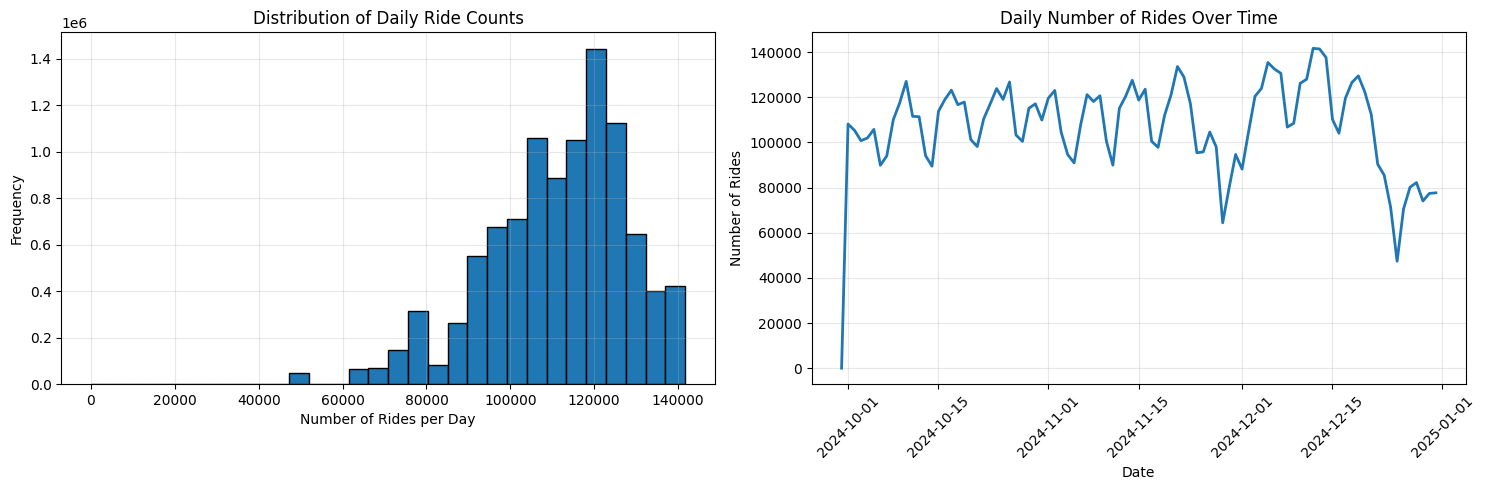

In [46]:
import matplotlib.pyplot as plt

daily_rides = (
    df.select(["date", "total_rides_per_day"])
    .sort("date")
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(daily_rides["total_rides_per_day"], bins=30, edgecolor='black')
ax1.set_xlabel("Number of Rides per Day")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Daily Ride Counts")
ax1.grid(True, alpha=0.3)

ax2.plot(daily_rides["date"], daily_rides["total_rides_per_day"], linewidth=2)
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of Rides")
ax2.set_title("Daily Number of Rides Over Time")
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()